# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.3.1
- statsmodels 0.14.4
- scipy 1.10.1

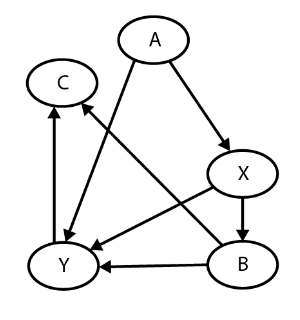

In [2]:
from IPython.display import Image
Image('causal_model.png')

## Actividad en clase

Haga lo siguiente:

- Cree un dataframe de tipo **combs** que siga la estructura indicada en el grafo.
- Visualice los scatters entre las variables del grafo.
- Determine cuáles variables del grafo son predictoras de A.
- Determine cuáles variables del grafo son predictoras de B.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que cada L es una décima más en la nota de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [1]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [2]:
NOISE_LEVEL = .2
N_SAMPLES = 1000

# Generate the data
a = np.random.randn(N_SAMPLES) 
x = a + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
b = x + NOISE_LEVEL*np.random.randn(N_SAMPLES)
y = a + x + b + NOISE_LEVEL*np.random.randn(N_SAMPLES)
c = y + b + NOISE_LEVEL*np.random.randn(N_SAMPLES)

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c), ('x', x), ('y', y)], 2))

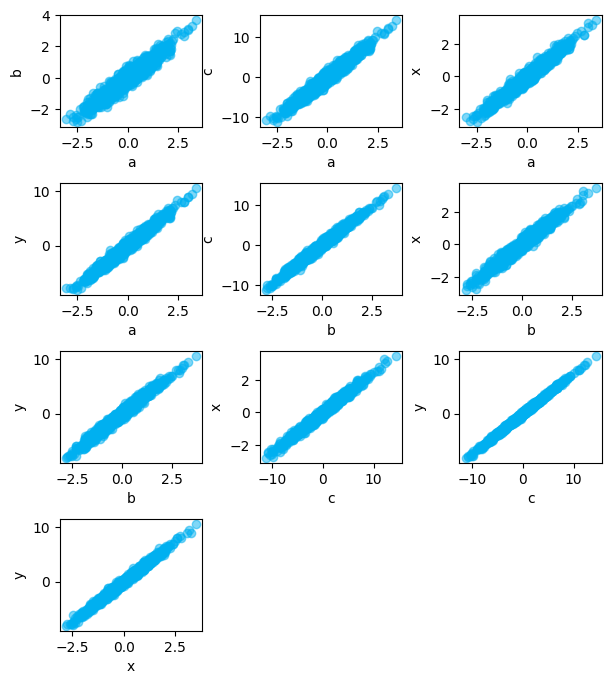

In [3]:
import matplotlib.pyplot as plt

COLORS = [
    '#00B0F0'
]

# Plot
plt.figure(figsize=(7,8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
        
    plt.subplot(4, 3, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

In [4]:
X = pd.DataFrame(np.vstack([b, x, c, y]).T, columns=['B', 'X', 'C', 'Y'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(a, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.271e+04
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        18:56:20   Log-Likelihood:                 540.35
No. Observations:                1000   AIC:                            -1071.
Df Residuals:                     995   BIC:                            -1046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.004      1.022      0.3

## B e Y

In [6]:
X = pd.DataFrame(np.vstack([a, x, c, y]).T, columns=['A', 'X', 'C', 'Y'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(b, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.079e+04
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        18:57:10   Log-Likelihood:                 754.91
No. Observations:                1000   AIC:                            -1500.
Df Residuals:                     995   BIC:                            -1475.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0092      0.004     -2.539      0.0

## A y C